1. Initialization

In [45]:
%load_ext autoreload
from analysis_RRDE import *
from analysis_RRDE import ECSA_calculation
import tkinter as tk
from tkinter import filedialog 
from tkinter import messagebox
import os
import pandas as pd
import awkward as ak
from numpy import savetxt

root = tk.Tk()
root.withdraw()
root.lift()
root.attributes("-topmost", True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


''

In [46]:
# Variables
A_geo = 0.196               # cm2
loading = 10                # ug/cm2
ir_comp = 26                # ohm
scan_rate = 0.05            # V/s for CO stripping
index = 11                  # number of lines of info to be removed

Pt_mass = loading * A_geo   # ug
charge_ecsa = 0.000210      # C/cm2

In [49]:
%autoreload
nbr_files = 1
file = filedialog.askopenfilename(title="Choose the file to be analyzed.")
V_disc, I_disc = get_disc_voltage_current(file, index)
I_ring = get_ring_current(file, index)

In [30]:
%autoreload
if nbr_files == 1:
    background_file = filedialog.askopenfilename(title="Choose the background file.")
    print(background_file)
    background_V_disc, background_I_disc = get_disc_voltage_current(background_file, index)

L:/P15 SEM/Guilherme/Huizes Samples/GC_PtC TKK 20wt.%/ML00/ML00_M034_Cyc0002.txt


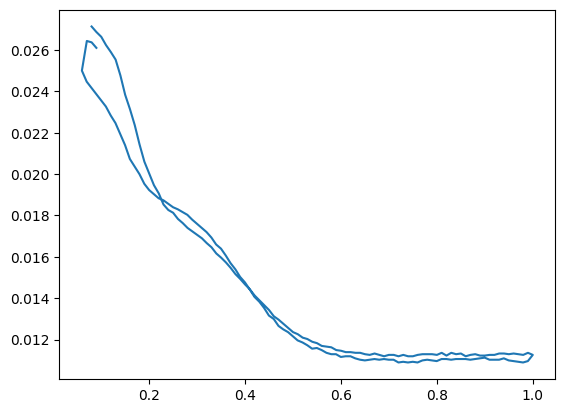

In [50]:
#plt.plot(V_disc, I_disc)
plt.plot(V_disc, I_ring)
#plt.plot(background_V_disc, background_I_disc)

Specific ECSA CO str: 192.16914487278245 m2/g(Pt) 	ECSA CO str: 3.766515239506536 cm2 
Specific ECSA HUPD:   112.24177812974267 m2/g(Pt) 	ECSA HUPD: 2.1999388513429565 cm2
	-------------------------------------------------------------------


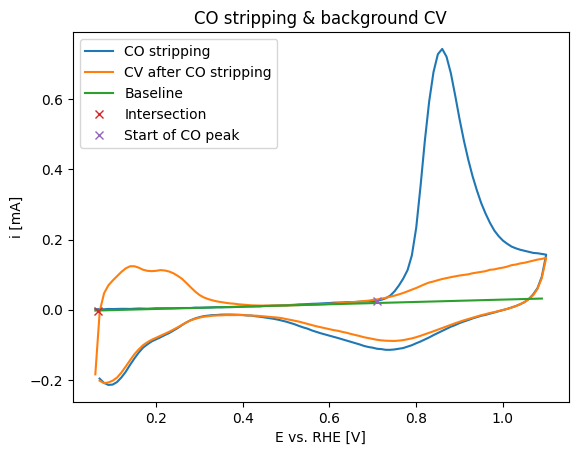

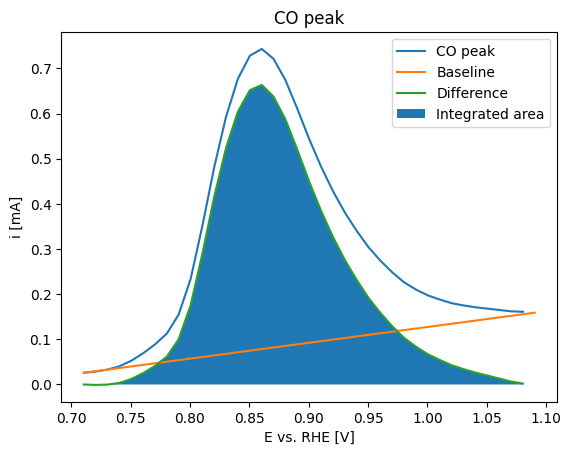

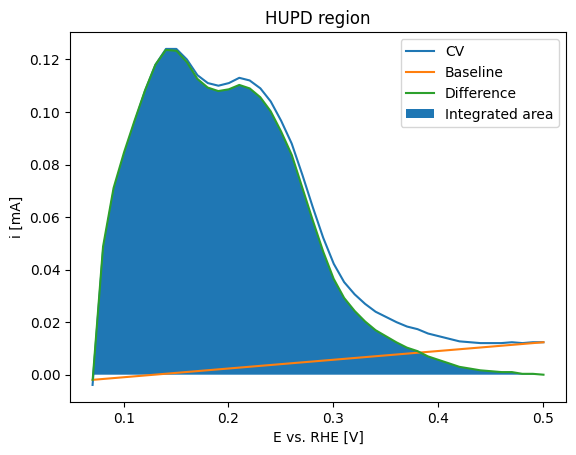

In [32]:
%autoreload
lower_voltage = 0.06   #from your macrolist
upper_voltage = 1.09
# The following values need to be tuned
DL_start = 0.50   #determines the starting point for your baseline
DL_end = 0.55     #determines the end point for your baseline
atol = 0.5        #determines the threshold where the CO peak deviates too much from baseline 

ecsa_calculation = ECSA_calculation(V_disc, I_disc, background_V_disc, background_I_disc)

specific_ECSAs, ECSAs = ecsa_calculation.calculating_ECSA(
    lower_voltage,
    upper_voltage,
    DL_start,
    DL_end,
    atol,
    scan_rate,
    charge_ecsa,
    Pt_mass,
)

ecsa_calculation.plotting()

In [14]:
%autoreload
nbr_files = 2 #not important, just not 1
files = filedialog.askopenfilenames(title="Choose the files to be analyzed.")
print(files)
data_matrix_disc = []
data_matrix_ring = []

for file in files: 
    V_disc, I_disc = get_disc_voltage_current(file, index)
    data_matrix_disc.append(V_disc)
    data_matrix_disc.append(I_disc)

    V_ring, I_ring = get_ring_voltage_current(file, index)
    data_matrix_ring.append(V_ring)
    data_matrix_ring.append(I_ring)



('L:/P15 SEM/Guilherme/Huizes Samples/GC_PtC TKK 20wt.%/ML00/ML00_M017_Cyc0014.txt', 'L:/P15 SEM/Guilherme/Huizes Samples/GC_PtC TKK 20wt.%/ML00/ML00_M018_Cyc0007.txt', 'L:/P15 SEM/Guilherme/Huizes Samples/GC_PtC TKK 20wt.%/ML00/ML00_M019_Cyc0002.txt')


In [20]:
for i in range(len(data_matrix_disc)):
    print(len(data_matrix_disc[i]))


188
188
268
268
190
190


In [25]:
# data_matrix_disc = ak.Array(data_matrix_disc)
# data_matrix_disc = np.transpose(data_matrix_disc)  #matrix with columns as follows: [V(file1); I(file1); V(file2); I(file2); ...]
# data_matrix_ring = np.transpose(data_matrix_ring)

Chosen file: L:/P15 SEM/Guilherme/Huizes Samples/GC_PtC TKK 20wt.%/ML00/ML00_M011_Cyc0003.txt
Shift by 0.000207 V.


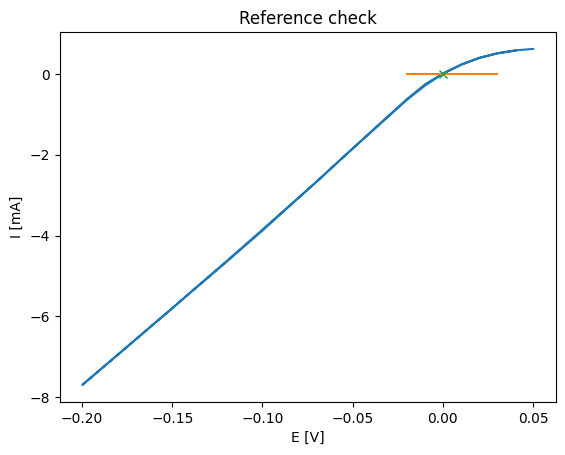

In [52]:
%autoreload
H2_file = filedialog.askopenfilename(title="Choose the file with CV under hydrogen.")
ref_V, ref_I = get_disc_voltage_current(H2_file, index)
print("Chosen file:",H2_file)

x_lower_limit = -0.02
x_upper_limit = 0.03
reference = reference_check(ref_V, ref_I, x_lower_limit, x_upper_limit)